In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [3]:
# criando sparksession
spark = SparkSession.builder.appName("Exemplo-1").getOrCreate()

In [4]:
# criando dataframe de pessoas
data = [
    (1, "Alice", 25, "F", 5),
    (2, "Bob", 30, "M", 8),
    (3, "Charlie", 22, "M", 1),
    (4, "David", 28, "M", 6),
    (5, "Eve", 35, "F", 10),
    (6, "Frank", 27, "M", 4),
    (7, "Grace", 29, "F", 7),
    (8, "Henry", 33, "M", 9),
    (9, "Ivy", 26, "F", 12),
    (10, "Jack", 31, "M", 17),
    (11, "Karen", 24, "F", 14),
    (12, "Leo", 32, "M", 6),
    (13, "Mia", 23, "F", 13),
    (14, "Nathan", 34, "M", 18),
    (15, "Olivia", 27, "F", 15),
    (16, "Peter", 30, "M", 19),
    (17, "Quinn", 28, "F", 16),
    (18, "Ryan", 33, "M", 20),
    (19, "Sophia", 26, "F", 3),
    (20, "Tom", 31, "M", 7)
]
people_df = spark.createDataFrame(data, ["id", "name", "age", "gender", "job_id"])

In [5]:
# criando dataframe de trabalhos
data = [
    (1, "Software Engineer", 50000),
    (2, "Data Analyst", 60000),
    (3, "Marketing Specialist", 45000),
    (4, "Sales Representative", 55000),
    (5, "Product Manager", 70000),
    (6, "Financial Analyst", 65000),
    (7, "Graphic Designer", 52000),
    (8, "Operations Manager", 75000),
    (9, "Customer Service Representative", 48000),
    (10, "Project Manager", 72000),
    (11, "Data Scientist", 80000),
    (12, "Business Analyst", 68000),
    (13, "Software Developer", 75000),
    (14, "UI/UX Designer", 62000),
    (15, "Financial Planner", 70000),
    (16, "Human Resources Manager", 73000),
    (17, "Digital Marketing Specialist", 58000),
    (18, "IT Support", 43000),
    (19, "Research Scientist", 75000),
    (20, "Trainee", 46000)
]
jobs_df = spark.createDataFrame(data, ["job_id", "job_title", "salary"])

In [6]:
# show dataframes
people_df.show()
jobs_df.show()

+---+-------+---+------+------+
| id|   name|age|gender|job_id|
+---+-------+---+------+------+
|  1|  Alice| 25|     F|     5|
|  2|    Bob| 30|     M|     8|
|  3|Charlie| 22|     M|     1|
|  4|  David| 28|     M|     6|
|  5|    Eve| 35|     F|    10|
|  6|  Frank| 27|     M|     4|
|  7|  Grace| 29|     F|     7|
|  8|  Henry| 33|     M|     9|
|  9|    Ivy| 26|     F|    12|
| 10|   Jack| 31|     M|    17|
| 11|  Karen| 24|     F|    14|
| 12|    Leo| 32|     M|     6|
| 13|    Mia| 23|     F|    13|
| 14| Nathan| 34|     M|    18|
| 15| Olivia| 27|     F|    15|
| 16|  Peter| 30|     M|    19|
| 17|  Quinn| 28|     F|    16|
| 18|   Ryan| 33|     M|    20|
| 19| Sophia| 26|     F|     3|
| 20|    Tom| 31|     M|     7|
+---+-------+---+------+------+

+------+--------------------+------+
|job_id|           job_title|salary|
+------+--------------------+------+
|     1|   Software Engineer| 50000|
|     2|        Data Analyst| 60000|
|     3|Marketing Specialist| 45000|
|     4|S

In [7]:
# selecionando colunas
people_df.select("name", "age").show()

+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 22|
|  David| 28|
|    Eve| 35|
|  Frank| 27|
|  Grace| 29|
|  Henry| 33|
|    Ivy| 26|
|   Jack| 31|
|  Karen| 24|
|    Leo| 32|
|    Mia| 23|
| Nathan| 34|
| Olivia| 27|
|  Peter| 30|
|  Quinn| 28|
|   Ryan| 33|
| Sophia| 26|
|    Tom| 31|
+-------+---+



In [8]:
# filtrando dados
people_df.filter(col("age") > 30).show()

+---+------+---+------+------+
| id|  name|age|gender|job_id|
+---+------+---+------+------+
|  5|   Eve| 35|     F|    10|
|  8| Henry| 33|     M|     9|
| 10|  Jack| 31|     M|    17|
| 12|   Leo| 32|     M|     6|
| 14|Nathan| 34|     M|    18|
| 18|  Ryan| 33|     M|    20|
| 20|   Tom| 31|     M|     7|
+---+------+---+------+------+



In [9]:
# agrupar e agregar dados
people_df.groupBy("gender").count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|    9|
|     M|   11|
+------+-----+



In [10]:
# ordenar dados
people_df.orderBy("age", ascending=False).show()

+---+-------+---+------+------+
| id|   name|age|gender|job_id|
+---+-------+---+------+------+
|  5|    Eve| 35|     F|    10|
| 14| Nathan| 34|     M|    18|
|  8|  Henry| 33|     M|     9|
| 18|   Ryan| 33|     M|    20|
| 12|    Leo| 32|     M|     6|
| 10|   Jack| 31|     M|    17|
| 20|    Tom| 31|     M|     7|
|  2|    Bob| 30|     M|     8|
| 16|  Peter| 30|     M|    19|
|  7|  Grace| 29|     F|     7|
| 17|  Quinn| 28|     F|    16|
|  4|  David| 28|     M|     6|
| 15| Olivia| 27|     F|    15|
|  6|  Frank| 27|     M|     4|
| 19| Sophia| 26|     F|     3|
|  9|    Ivy| 26|     F|    12|
|  1|  Alice| 25|     F|     5|
| 11|  Karen| 24|     F|    14|
| 13|    Mia| 23|     F|    13|
|  3|Charlie| 22|     M|     1|
+---+-------+---+------+------+



In [11]:
# unindo as tabelas
people_df.join(jobs_df, ["job_id"], "inner").show()

+------+---+-------+---+------+--------------------+------+
|job_id| id|   name|age|gender|           job_title|salary|
+------+---+-------+---+------+--------------------+------+
|     1|  3|Charlie| 22|     M|   Software Engineer| 50000|
|     3| 19| Sophia| 26|     F|Marketing Specialist| 45000|
|     4|  6|  Frank| 27|     M|Sales Representative| 55000|
|     5|  1|  Alice| 25|     F|     Product Manager| 70000|
|     6|  4|  David| 28|     M|   Financial Analyst| 65000|
|     6| 12|    Leo| 32|     M|   Financial Analyst| 65000|
|     7|  7|  Grace| 29|     F|    Graphic Designer| 52000|
|     7| 20|    Tom| 31|     M|    Graphic Designer| 52000|
|     8|  2|    Bob| 30|     M|  Operations Manager| 75000|
|     9|  8|  Henry| 33|     M|Customer Service ...| 48000|
|    10|  5|    Eve| 35|     F|     Project Manager| 72000|
|    12|  9|    Ivy| 26|     F|    Business Analyst| 68000|
|    13| 13|    Mia| 23|     F|  Software Developer| 75000|
|    14| 11|  Karen| 24|     F|      UI/

In [12]:
# adicionando novas colunas
people_df = people_df.withColumn("age_plus_10", col("age") + 10)
people_df.show()

+---+-------+---+------+------+-----------+
| id|   name|age|gender|job_id|age_plus_10|
+---+-------+---+------+------+-----------+
|  1|  Alice| 25|     F|     5|         35|
|  2|    Bob| 30|     M|     8|         40|
|  3|Charlie| 22|     M|     1|         32|
|  4|  David| 28|     M|     6|         38|
|  5|    Eve| 35|     F|    10|         45|
|  6|  Frank| 27|     M|     4|         37|
|  7|  Grace| 29|     F|     7|         39|
|  8|  Henry| 33|     M|     9|         43|
|  9|    Ivy| 26|     F|    12|         36|
| 10|   Jack| 31|     M|    17|         41|
| 11|  Karen| 24|     F|    14|         34|
| 12|    Leo| 32|     M|     6|         42|
| 13|    Mia| 23|     F|    13|         33|
| 14| Nathan| 34|     M|    18|         44|
| 15| Olivia| 27|     F|    15|         37|
| 16|  Peter| 30|     M|    19|         40|
| 17|  Quinn| 28|     F|    16|         38|
| 18|   Ryan| 33|     M|    20|         43|
| 19| Sophia| 26|     F|     3|         36|
| 20|    Tom| 31|     M|     7| 

In [13]:
# renomeando colunas
people_df = people_df.withColumnRenamed("age_plus_10", "new_age")
people_df.show()

+---+-------+---+------+------+-------+
| id|   name|age|gender|job_id|new_age|
+---+-------+---+------+------+-------+
|  1|  Alice| 25|     F|     5|     35|
|  2|    Bob| 30|     M|     8|     40|
|  3|Charlie| 22|     M|     1|     32|
|  4|  David| 28|     M|     6|     38|
|  5|    Eve| 35|     F|    10|     45|
|  6|  Frank| 27|     M|     4|     37|
|  7|  Grace| 29|     F|     7|     39|
|  8|  Henry| 33|     M|     9|     43|
|  9|    Ivy| 26|     F|    12|     36|
| 10|   Jack| 31|     M|    17|     41|
| 11|  Karen| 24|     F|    14|     34|
| 12|    Leo| 32|     M|     6|     42|
| 13|    Mia| 23|     F|    13|     33|
| 14| Nathan| 34|     M|    18|     44|
| 15| Olivia| 27|     F|    15|     37|
| 16|  Peter| 30|     M|    19|     40|
| 17|  Quinn| 28|     F|    16|     38|
| 18|   Ryan| 33|     M|    20|     43|
| 19| Sophia| 26|     F|     3|     36|
| 20|    Tom| 31|     M|     7|     41|
+---+-------+---+------+------+-------+



In [20]:
# funções de agregação
people_df.agg(avg("age").alias("avg_age")).show()

+-------+
|avg_age|
+-------+
|   28.7|
+-------+



In [17]:
people_df.groupBy("gender").agg(format_number(avg("age"), 1).alias("avg_age")).show()

+------+-------+
|gender|avg_age|
+------+-------+
|     F|   27.0|
|     M|   30.1|
+------+-------+



In [19]:
# funções de string
people_df.select(upper("name").alias("name")).show()

+-------+
|   name|
+-------+
|  ALICE|
|    BOB|
|CHARLIE|
|  DAVID|
|    EVE|
|  FRANK|
|  GRACE|
|  HENRY|
|    IVY|
|   JACK|
|  KAREN|
|    LEO|
|    MIA|
| NATHAN|
| OLIVIA|
|  PETER|
|  QUINN|
|   RYAN|
| SOPHIA|
|    TOM|
+-------+



In [21]:
# criando um view temporaria
people_df.createOrReplaceTempView("people")
jobs_df.createOrReplaceTempView("jobs")

# usando spark SQL para consultar dados
result_df = spark.sql("SELECT p.name, j.job_title FROM people p JOIN jobs j ON p.job_id = j.job_id WHERE p.age > 30")
result_df.show()

+------+--------------------+
|  name|           job_title|
+------+--------------------+
|   Leo|   Financial Analyst|
|   Tom|    Graphic Designer|
| Henry|Customer Service ...|
|   Eve|     Project Manager|
|  Jack|Digital Marketing...|
|Nathan|          IT Support|
|  Ryan|             Trainee|
+------+--------------------+



In [22]:
import matplotlib.pyplot as plt

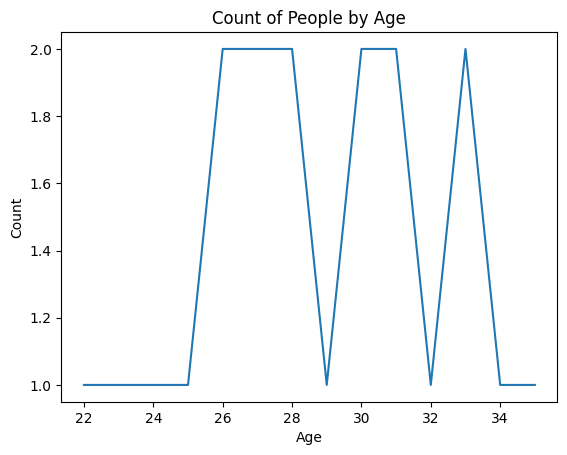

In [23]:
# agrupando por idade e contando o numero de pessoas
age_counts = people_df.groupBy("age").count().orderBy("age").collect()

# extraindo as idades e contagens
ages = [row["age"] for row in age_counts]
counts = [row["count"] for row in age_counts]

# criando um grafico de barras
plt.plot(ages, counts)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of People by Age")
plt.show()